In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt

import torch.nn as nn

# Introduction to Pytorch 

Pytorch is an Imperative Style, High-Performance, Pythonic
Deep Learning library [1].

It supports natively hardware accelerators, such as GPUs, democratises the development, learning and deployment of deep learning models.

[1] Paszke, Adam, et al. "Pytorch: An imperative style, high-performance deep learning library." Advances in neural information processing systems. 2019.

# The $\texttt{pytorch}$ tensor: A python object for high performing array operations.

### From a $\texttt{numpy}$ array to a $\texttt{pytorch}$ tensor

Basically, if you are comfortable in $\texttt{numpy}$ array, you will be comfortable in $\texttt{pytorch}$ tensor.



In [2]:
import numpy as np

x_np = np.asarray([-1., 0., 1.])
x_np

array([-1.,  0.,  1.])

In [3]:
x_torch = torch.tensor([-1., 0., 1.])
x_torch

tensor([-1.,  0.,  1.])

array and tensor are different python objects

In [4]:
x_np == x_torch

False

it's easy to switch from one to the other

In [5]:
x_np == x_torch.numpy()

array([ True,  True,  True])

In [6]:
torch.tensor(x_np) == x_torch 

tensor([True, True, True])

In [7]:
x_torch == x_torch.data 

tensor([True, True, True])

You have plenty of implemented methods

In [8]:
x_np = np.random.randn(10)
x_torch = torch.randn(10)

x_np.mean(), x_torch.mean()
x_np.max(), x_torch.max()
# and many others...

(1.8799979720373663, tensor(2.1187))

and even more for pytorch

In [9]:
try: 
    x_np.abs()
except:
    print('Not implemented in numpy')

x_torch.abs()

Not implemented in numpy


tensor([2.1187, 1.0198, 0.0995, 1.3424, 1.1761, 1.3682, 1.2055, 0.4106, 1.7021,
        1.3280])

In [10]:
try: 
    x_np.exp()
except:
    print('Not implemented in numpy')

x_torch.exp()

Not implemented in numpy


tensor([8.3204, 2.7726, 0.9053, 0.2612, 0.3085, 0.2546, 3.3383, 1.5077, 5.4852,
        0.2650])

Be careful with copy both in numpy and pytorch 

In [11]:
x_np = np.asarray([-1., 0., 1.])
x = x_np
x += 1
x_np 

array([0., 1., 2.])

In [12]:
x_torch = torch.tensor([-1., 0., 1.])
x = x_torch
x += 1
x_torch

tensor([0., 1., 2.])

In [13]:
x_np = np.asarray([-1., 0., 1.])
x = x_np.copy()
x += 1
x_np 

array([-1.,  0.,  1.])

In [14]:
x_torch = torch.tensor([-1., 0., 1.])
x = x_torch.clone() # Copy 
x += 1
x_torch

tensor([-1.,  0.,  1.])

but a tensor comes with new attributes... 

In [15]:
x_torch.device

device(type='cpu')

a tensor is stored on a specified device, here a CPU. It is possible to send it to a GPU, if you have one ;) 

In [16]:
# It is straightforward to send a tensor on a GPU
x_torch = x_torch.cuda()
x_torch 

tensor([-1.,  0.,  1.], device='cuda:0')

wait... WHAT? 

click on execution -> execution type -> GPU accelarator



In [17]:
!nvidia-smi

Thu Nov 12 14:32:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    40W / 300W |   1241MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### CUDA: Accelerated calculus on GPU
In this section, we will benchmark computation time of high-dimensional matrix multiplication

In [18]:
import time 
from tqdm import tqdm_notebook as tqdm 

In [19]:
n = 100
x = np.random.randn(1000, 1000)

tic = time.clock()
for _ in tqdm(range(n)):

    np.matmul(x, x)
tac = time.clock()
print('Time with numpy array', tac - tic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Time with numpy array 12.659118000000001


In [20]:
n = 100
x = torch.randn(1000, 1000)

tic = time.clock()
for _ in tqdm(range(n)):
    torch.matmul(x, x)
tac = time.clock()
print('Time with a cpu stored tensor', tac - tic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Time with a cpu stored tensor 2.0317039999999977


In [21]:
n = 100
x = torch.randn(1000, 1000)
x = x.cuda()

tic = time.clock()
for _ in tqdm(range(n)):
    torch.matmul(x, x)
tac = time.clock()
print('Time with gpu stored tensor', tac - tic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Time with gpu stored tensor 0.030978999999998535


### Autograd: efficient library for automatic differentiation

In [22]:
x = torch.tensor(1.)
x.requires_grad = True 
print(x, x.grad)

tensor(1., requires_grad=True) None


In [23]:
t = torch.tensor(0., requires_grad=True)
x = torch.tensor(1., requires_grad=True)
y = x**2*t

Compute $\frac{\partial y}{\partial x}$ and $\frac{\partial y}{\partial t}$

In [24]:
dy_dx = torch.autograd.grad(y, x, retain_graph=True)
dy_dx

(tensor(0.),)

In [25]:
dy_dt = torch.autograd.grad(y, t, retain_graph=True) # Check what happens when not specifying retain_graph = True
dy_dt

(tensor(1.),)

Hopefully, pytorch has a straightforward way to compute the derivative of a computational graph.


In [26]:
t = torch.tensor(0., requires_grad=True)
x = torch.tensor(1., requires_grad=True)
y = x**2*t

y.backward() # Computes derivatives with respect to *all* variables y depends with.

where are stored the derivatives?

In [27]:
print(x.grad, t.grad)

tensor(0.) tensor(1.)


#### Exercise: Finds local minimum of a function by gradient descent

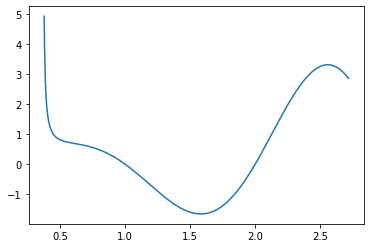

In [28]:
import matplotlib.pyplot as plt

def f(x):
    return x**2/(1+torch.log(x))*torch.sin(np.pi*x)

x = torch.arange(np.exp(-1.)+0.01, np.exp(1.), 0.001)

plt.plot(x.numpy(), f(x).numpy())
plt.show()

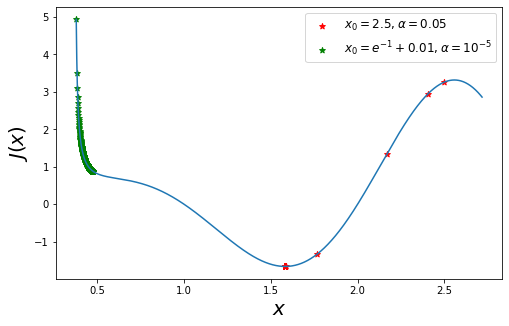

In [29]:
def gradient_descent(x, f, lr=0.05):
    # Computes f(x) and updates x = x - lr*grad_x(f)(x)
    x = x.clone().detach().requires_grad_(True)
    y = f(x)
    y.backward()
    x = x - lr*x.grad
    return x 

plt.figure(figsize=(8,5))

x = torch.tensor(2.5, requires_grad=True)
x_updates = [x.clone().detach().numpy()]
for _ in range(100):
    x = gradient_descent(x, f)
    x_updates.append(x.clone().detach().numpy())
plt.scatter(x_updates, f(torch.tensor(np.asarray(x_updates))).numpy(), marker='*', color='red', label=r'$x_0=2.5, \alpha=0.05$')


x = torch.tensor(np.exp(-1.)+0.01, requires_grad=True)
x_updates = [x.clone().detach().numpy()]
for _ in range(1000):
    x = gradient_descent(x, f, lr=0.00001) # Play with the learning rate (until 0.00001)
    x_updates.append(x.clone().detach().numpy())
plt.scatter(x_updates, f(torch.tensor(np.asarray(x_updates))).numpy(), marker='*', color='green', label=r'$x_0=e^{-1} + 0.01, \alpha=10^{-5}$')


x = torch.arange(np.exp(-1.)+0.01, np.exp(1.), 0.001)
plt.plot(x.numpy(), f(x).numpy())

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$J(x)$', fontsize=20)
plt.legend(fontsize=12)
plt.show()

#How to build a deep model

## Parameters: a tensor with new properties

Learning a model is equivalent to find a set of parameters which achieves a cost optimality. 

For instance, linear regression consists in finding $\theta$ such that:
$$\mathcal L(\theta) := \frac 1 n \sum_{i=1}^n (y_i - x_i^\top \theta)^2 $$
is minimal for some data $(x_i, y_i)_{1 \leq i \leq n}$.

In order to differentiate the role of a variable (here $x$ and $y$) with parameters of a model (here $\theta$), pytorch provides an object named parameter.

Roughly, parameters can be used in the same way as tensors. But they offer new persepective, for instance by interacting substantially with other pytorch objects (module and optim). 

See how finding a local minimum is performed when using a pytorch parameter.




In [30]:
import torch.nn as nn 

x_param = nn.Parameter(torch.tensor(3.))
x_param

Parameter containing:
tensor(3., requires_grad=True)

In [31]:
optimizer = torch.optim.SGD(params=[x_param], lr=0.05)
for _ in range(1000):
    optimizer.zero_grad() # Cleans gradients in the scope of the optimizer (here x_param), comment it to see how gradients accumulate
    y = f(x_param) # Get the computation graph (note that parameters behave similarly than tensor for calculus)
    y.backward() # Computes the gradient
    optimizer.step() # Updates parameter value wrt the rule defined by the optimizer: (here x = x - 0.05*grad_x(f)(x))
print(x_param)

Parameter containing:
tensor(3.0064, requires_grad=True)


#### Exercise: Logistic regression 

In [32]:
class DataGenerator:
    def __init__(self, dim=100, delta_mu=0.2, bias=0.5):
        self.dim = dim 
        self.delta_mu = delta_mu
        self.bias = bias

    def samples(self, n):
        y = np.random.rand(n, 1) > self.bias
        x = y*(self.delta_mu + np.random.randn(n, self.dim))
        x += (1.-y)*(-self.delta_mu + np.random.randn(n, self.dim))
        return x, y 
data_generator = DataGenerator()

In [33]:
x_train, y_train = data_generator.samples(n=10000)
x_test, y_test = data_generator.samples(n=1000)

print(x_train.shape, y_train.shape)

(10000, 100) (10000, 1)


In [34]:
# How we do it with scikit-learn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train.ravel())
print('Accuracy', model.score(x_test, y_test))
print('Parameters', model.coef_)

Accuracy 0.973
Parameters [[0.37579144 0.18593471 0.47898978 0.56847846 0.53774957 0.57099819
  0.36818001 0.47556766 0.34276949 0.4308645  0.3860535  0.45773102
  0.48438401 0.55884853 0.59753704 0.36576705 0.56823878 0.54163293
  0.38971815 0.37771285 0.3998977  0.4204066  0.57073676 0.35841477
  0.44911651 0.56689442 0.46038084 0.43141841 0.51137592 0.49921394
  0.33098621 0.42587842 0.39238016 0.272565   0.42750358 0.37334814
  0.50230503 0.47956923 0.39622508 0.37561827 0.42612852 0.40766448
  0.42831183 0.43281895 0.44480222 0.54543084 0.36748812 0.60167025
  0.46301876 0.51615404 0.56160991 0.55720427 0.57908005 0.39803971
  0.4430448  0.4157427  0.50584813 0.41419428 0.48010551 0.36139313
  0.36137244 0.35285254 0.42792103 0.4774503  0.32616079 0.49942826
  0.39236985 0.27541287 0.28880896 0.50186905 0.54964442 0.34696887
  0.39819293 0.682913   0.22616066 0.47604035 0.62002414 0.51807542
  0.38133466 0.53772743 0.4955504  0.38850847 0.54178016 0.39867528
  0.48289066 0.3680693

In [35]:
theta = nn.Parameter(torch.randn(data_generator.dim)) # Initialize randomly parameters
print('Initialized parameter', theta)

batch_size = 32
num_iter = 1000

optimizer = torch.optim.Adam(params=[theta], lr=0.01, weight_decay=1e-2) # Weight decay is the L^2 penalty

for _ in tqdm(range(num_iter)):
    optimizer.zero_grad()
    x, y = data_generator.samples(batch_size)

    x = torch.tensor(x).float()
    y = torch.tensor(y).float()
    y_hat = nn.Sigmoid()(torch.matmul(x, theta)).reshape(-1, 1)

    loss = nn.BCELoss()(y_hat, y)
    loss.backward()
    optimizer.step()


print('Learned parameter', theta)

y_hat = (nn.Sigmoid()(torch.matmul(torch.tensor(x_test).float(), theta)) > 0.5).float()
print('Accuracy', (torch.tensor(y_test.reshape(-1)).float() == y_hat).float().mean())

Initialized parameter Parameter containing:
tensor([ 0.4803,  1.1889,  0.1339, -0.4454, -0.6176,  0.5652, -0.5079, -0.7678,
        -1.9902,  0.6122,  0.8183, -1.7230, -0.1414, -1.3366, -0.5163, -0.5327,
         0.6765, -2.4666, -1.7234,  0.2526, -0.4900, -1.9308, -0.6280, -0.7972,
        -1.4094, -0.4209,  1.9708,  1.3917, -0.2760,  1.5157,  1.0916,  0.4950,
        -0.2016, -0.0790, -0.8599,  1.1155, -0.8909, -0.4221,  0.0225, -1.2413,
         0.3249, -1.2049, -1.2754,  0.6138,  0.5465, -0.1172,  0.5085, -1.3760,
        -0.4874, -1.1290, -0.8310,  0.2918, -0.1370,  0.0805, -1.1081, -1.4215,
         0.1509, -1.1723,  0.3323, -0.8282, -0.1325, -0.8715, -0.8266, -1.5240,
        -1.1382,  0.1084,  0.5837,  1.3102, -0.5905, -0.3701, -1.8217, -0.5903,
        -0.7759,  0.2734,  0.4701, -0.8260, -0.9254,  0.1469,  1.9688,  0.8340,
         0.9875,  0.8566, -2.1196, -2.6019,  0.0422, -0.3526,  0.4136,  0.6212,
         0.4282,  1.5896, -1.7078,  0.7111,  1.0863,  1.3261,  0.3268,  0.07

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



Learned parameter Parameter containing:
tensor([0.1801, 0.3308, 0.2365, 0.2536, 0.2772, 0.2727, 0.2308, 0.3107, 0.2626,
        0.2221, 0.2787, 0.2621, 0.2158, 0.2710, 0.2847, 0.2181, 0.2593, 0.1977,
        0.2597, 0.2221, 0.2111, 0.2080, 0.2680, 0.2387, 0.2750, 0.2442, 0.3623,
        0.2805, 0.2306, 0.2216, 0.2702, 0.2770, 0.2531, 0.2494, 0.2569, 0.2862,
        0.3061, 0.2737, 0.1874, 0.2285, 0.2455, 0.1896, 0.2397, 0.2151, 0.2106,
        0.2790, 0.1955, 0.2295, 0.2770, 0.2718, 0.2847, 0.2489, 0.2531, 0.1986,
        0.2168, 0.2328, 0.2246, 0.2041, 0.1927, 0.2402, 0.2866, 0.2334, 0.2640,
        0.2831, 0.1973, 0.1947, 0.2237, 0.2377, 0.2824, 0.2291, 0.2474, 0.2494,
        0.2408, 0.2335, 0.1841, 0.1628, 0.1831, 0.2414, 0.2196, 0.2949, 0.2362,
        0.2235, 0.1882, 0.1771, 0.2947, 0.1916, 0.2299, 0.2838, 0.3467, 0.2560,
        0.2504, 0.2850, 0.3135, 0.2340, 0.2573, 0.2465, 0.2652, 0.2852, 0.2360,
        0.2717], requires_grad=True)
Accuracy tensor(0.9750)


## Module: a class for stacking layers
Pytorch instantiates deep models by inheritance of an abstract class nn.Module. In the __init__ method, we declare the layers as module class attributes. Here the layers are nn.Module object. Then, a deep models has a recursive structure and such model can be used as a layer for an even bigger model. For instance, model.parameters() returns all layer.parameters() for layers instanciated in __init__.

```
class Model(nn.Module):
  def __init__(self, dim):
    super(Model, self).__init__()
    self.layer = nn.Linear(dim_1, dim_2)
    ...
```

After layers instanciation, we need to instanciate the forward pass of the model i.e. the relation between inputs and outputs of the model. This is done by the method forward(self, ...). If not implemented, nn.Module returns an error. Usually, we do not use model.forward(x) but simply model(x). 




#### Exercise: Logistic regression as a module

In [36]:
class LogisticRegression(nn.Module):
    def __init__(self, dim):
        super(LogisticRegression, self).__init__()
        self.layer = nn.Linear(dim, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        y = self.layer(x)
        return self.activation(y)

In [37]:
model = LogisticRegression(dim=data_generator.dim) 
model = model.cuda() # model benefits of the .cuda() method from nn.Module for sending the model to the GPU

batch_size = 32
num_iter = 1000

params = model.parameters() # returns parameters as an iterator

optimizer = torch.optim.Adam(params=params, lr=0.01, weight_decay=1e-2)

for _ in tqdm(range(num_iter)):
    optimizer.zero_grad()
    x, y = data_generator.samples(batch_size)

    x = torch.tensor(x).float()
    y = torch.tensor(y).float()
    x, y = x.cuda(), y.cuda() # send data to the GPU
    y_hat = model(x) # model(x) is equivalent to model.forward(x)

    loss = nn.BCELoss()(y_hat, y) 
    loss.backward() 
    optimizer.step()

model = model.cpu() # sends the model on CPU
y_hat = (model(torch.tensor(x_test).float()) > 0.5).float()
print('Accuracy', (torch.tensor(y_test).float() == y_hat).float().mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()



Accuracy tensor(0.9730)


# Training a deep net: MNIST case of study

## Data pipeline

Pytorch brings very efficient objects for optimizing memory access to the data. It is mandatory since high-dimensional data (texts and images) may not fit in memory. 

Usually, there are two steps:
1. Where is (How to access to) the data: Dataset https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
2. How to browse the data: DataLoader https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

The DataLoader builds an iterable on the data. .next() method returns a batch of data. Thus, you need to specify the batch_size, if you want to shuffle the data, ... when you instantiate your dataloader.  

Hopefully, torchvision.datasets contains all the dataset you need for now. Thus, you can easily create a dataloader from it.


In [38]:
# Get dataset

import torchvision
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

mnist_train = torchvision.datasets.MNIST(root='data/train', download=True, train=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='data/test', download=True, train=False, transform=transform)

Extracting data/train/MNIST/raw/train-images-idx3-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/train-labels-idx1-ubyte.gz to data/train/MNIST/raw



Extracting data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/train/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data/test/MNIST/raw/train-images-idx3-ubyte.gz to data/test/MNIST/raw




Extracting data/test/MNIST/raw/train-labels-idx1-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/test/MNIST/raw
Processing...
Done!


In [39]:
# Create dataloader

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=32) 
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=256) 

## A deep feed forward net

In [40]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, dim=28*28, hidden_dim=1024, classes=10):
        super(MultiLayerPerceptron, self).__init__()
        self.layer_1 = nn.Linear(dim, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer_3 = nn.Linear(hidden_dim, classes)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = x.reshape(-1, x.shape[-1]*x.shape[-2])
        h = self.layer_1(x)
        h = self.activation(h)
        h = self.layer_2(h)
        h = self.activation(h)
        h = self.layer_3(h)
        p = nn.Softmax()(h)
        return p

## Training

In [41]:
num_epochs = 10

mlp =  MultiLayerPerceptron(dim=28*28)
mlp = mlp.cuda()

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=32) 
optimizer = torch.optim.Adam(params=mlp.parameters())

for _ in tqdm(range(num_epochs)):
    for x, y in train_loader:
        optimizer.zero_grad()
        x, y = x.cuda(), y.cuda()
        y_hat = mlp(x)
        loss = nn.CrossEntropyLoss()(y_hat, y)
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


## Testing

In [42]:
accuracy = []
for x, y in test_loader:
    x, y = x.cuda(), y.cuda()
    y_hat = mlp(x)
    pred = torch.max(y_hat, 1)[1]
    accuracy.append((pred == y).float())

torch.cat(accuracy).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor(0.9516, device='cuda:0')

# Exercises

## Logistic Regression with data loader
Code the training procedure of the logistic regression using a dataloader.

In [43]:
x_train, y_train = data_generator.samples(10000)
x_test, y_test = data_generator.samples(1000)

train_set = torch.utils.data.TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).float())
test_set = torch.utils.data.TensorDataset(torch.tensor(x_test).float(), torch.tensor(y_test).float())

train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=32, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set, 
                                          batch_size=256, 
                                          shuffle=False)

model = LogisticRegression(dim=data_generator.dim) 
model = model.cuda() # model benefits of the .cuda() method from nn.Module for sending the model to the GPU

num_epochs = 10

params = model.parameters() # returns parameters as an iterator
optimizer = torch.optim.Adam(params=params, lr=0.01, weight_decay=1e-2)

# TRAINING
for _ in tqdm(range(num_epochs)):
    for x, y in train_loader:
        optimizer.zero_grad()
        x, y = x.cuda(), y.cuda() # send data to the GPU
        y_hat = model(x) # model(x) is equivalent to model.forward(x)

        loss = nn.BCELoss()(y_hat, y) 
        loss.backward() 
        optimizer.step()

# TESTING
for x, y in test_loader:
    x, y = x.cuda(), y.cuda() # send data to the GPU
    y_hat = model(x)
    try: 
        acc = torch.cat([acc,((y_hat > 0.5).float() == y).float()])
    except:
        acc = ((y_hat > 0.5).float() == y).float()
   
    

print('Model accuracy on test data', acc.mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Model accuracy on test data tensor(0.9710, device='cuda:0')


## Exercise: Factoring
As you can see, our model is instanciated, trained and tested in different notebook cells. 

It is easier for understanding the different blocks and debugging. But it is not efficient when dealing with bigger models or more complex optimization (i.e training procedure).

Implement an abstract class where the model is an attribute with the following methods:
.train() : train the model 
.test() : test the model

Try to make your class as flexible as possible. 

Bonus: implement a **callback** method for early stopping of training based on error on a validation set.

See https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html

In [44]:
class ModelWrapper:
    def __init__(self, model):
        self.model = model
        self.train_loader = None
        self.optimizer = None
        self.loss = None
        self.cuda = False

    def train_one_iter(self, x, y):
        self.optimizer.zero_grad()
        if self.cuda:
            x, y = x.cuda(), y.cuda()
        y_hat = self.model(x)
        loss = self.loss(y_hat, y)
        loss.backward()
        self.optimizer.step()
    
    def train(self, training_data, batch_size=32, epochs=10):
        self.model.train()
        train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size) 
        for _ in range(epochs):
            for x, y in train_loader:
                self.train_one_iter(x, y)

    def test(self, testing_data, batch_size=256):
        test_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size)
        accuracy = []
        for x, y in test_loader:
            if self.cuda:
                x, y = x.cuda(), y.cuda()
            y_hat = self.model(x)
            pred = torch.max(y_hat, 1)[1]
            accuracy.append((pred == y).float())
        return torch.cat(accuracy).mean()

    def compile(self, optimizer, loss=None, lr=0.001, weight_decay=0., cuda=True, init_scale=None):
        self.loss = loss
        try: 
            self.optimizer = optimizer(params=self.model.parameters(), 
                                 lr=lr,
                                 weight_decay=weight_decay)
        except:
            print('Must be called after create_model()')    

        self.cuda = cuda

        if self.cuda:
            self.model = self.model.cuda()    

        if init_scale is not None:
            for layer in model_wrapper.model.modules():
                try: 
                    layer.weight.data = init_scale*torch.randn_like(layer.weight.data)
                except:
                    pass

model_wrapper = ModelWrapper(MultiLayerPerceptron())
model_wrapper.compile(loss=nn.CrossEntropyLoss(), 
                      optimizer=torch.optim.Adam)
model_wrapper.train(mnist_train, epochs=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [45]:
model_wrapper.test(mnist_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor(0.9203, device='cuda:0')

## Exercise: Parameter Initialization
Start again the mnist classification problem by changing initialization of weights:
- Set parameters to 0.
- Set parameters to $\mathcal N(0, \sigma^2)$. Increase the value of $\sigma$ e.g. $\sigma=10$.

In [47]:
model_wrapper = ModelWrapper(MultiLayerPerceptron())
model_wrapper.compile(loss=nn.CrossEntropyLoss(), 
                      optimizer=torch.optim.Adam, 
                      init_scale=0.)
model_wrapper.train(mnist_train, epochs=1)
model_wrapper.test(mnist_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor(0.7074, device='cuda:0')

In [48]:
model_wrapper = ModelWrapper(MultiLayerPerceptron())
model_wrapper.compile(loss=nn.CrossEntropyLoss(), 
                      optimizer=torch.optim.Adam, 
                      init_scale=10.)
model_wrapper.train(mnist_train, epochs=1)
model_wrapper.test(mnist_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor(0.1051, device='cuda:0')

Parameter initialization is mandatory for training deep networkq. Here, we have exhibited that when pushing them to 0, the network performs badly. More suprisingly, when parameters are initalized with a high variance, the network does not perform better than random. This can be explained by the shape of activation function (here tanh). For values larger than 3 or 5, tanh is constant, thus has a null gradient.

That's why we use the Glorot initialization!


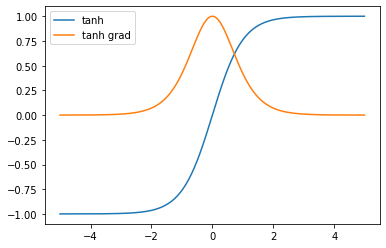

In [49]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))  /  (np.exp(x) + np.exp(-x))

def d_tanth_d_x(x):
    return 1 - tanh(x)**2


x = np.arange(-5, 5, 0.01)

plt.plot(x, tanh(x), label='tanh')
plt.plot(x, d_tanth_d_x(x), label='tanh grad')
plt.legend()
plt.show()

## Exercise: Dropout regularization

Start again the mnist classification problem by adding a dropout regularization.
https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

BONUS: implement the dropout layer without using nn.Dropout() (add mode='train' or 'test' when implementing the forward method).


In [50]:
class MultiLayerPerceptronDropout(nn.Module):
    def __init__(self, dim=28*28, hidden_dim=1024, classes=10, dropout=0.25):
        super(MultiLayerPerceptronDropout, self).__init__()
        self.layer_1 = nn.Linear(dim, hidden_dim)
        self.dropout_1 = nn.Dropout(dropout)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout_2 = nn.Dropout(dropout)
        self.layer_3 = nn.Linear(hidden_dim, classes)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = x.reshape(-1, x.shape[-1]*x.shape[-2])
        h = self.layer_1(x)
        h = self.activation(h)
        h = self.dropout_1(h)
        h = self.layer_2(h)
        h = self.activation(h)
        h = self.dropout_2(h)
        h = self.layer_3(h)
        p = nn.Softmax(dim=1)(h)
        return p


model_wrapper = ModelWrapper(MultiLayerPerceptronDropout())
model_wrapper.compile(loss=nn.CrossEntropyLoss(), 
                      optimizer=torch.optim.Adam)
model_wrapper.train(mnist_train, epochs=3)

print('Before eval', model_wrapper.test(mnist_test))
model_wrapper.model.eval()
print('After eval', model_wrapper.test(mnist_test))

Before eval tensor(0.9314, device='cuda:0')
After eval tensor(0.9400, device='cuda:0')


Note that performances are degraded if not using .eval(). This is because the behavior of dropout is not the same at test time.

From the wrapper class perspective, you should start the test method by applying self.model.eval() (as it is done in the train method). But, for the purpose of the coding session, we will continue this way.


In [51]:
class HomeMadeDropout(nn.Module):
    def __init__(self, dropout=0.5):
        super(HomeMadeDropout, self).__init__()
        self.dropout = dropout

    def forward(self, x):
        # As you can see by using self.training, the behavior of the dropout layer 
        # is different at train and test time. 
        if self.training:
            drop = (torch.rand(x.shape[1]) > self.dropout).reshape(1, -1).cuda()
            x = x*(drop / (1-self.dropout))
        return x


class MultiLayerPerceptronDropout(nn.Module):
    def __init__(self, dim=28*28, hidden_dim=1024, classes=10, dropout=0.25):
        super(MultiLayerPerceptronDropout, self).__init__()
        self.layer_1 = nn.Linear(dim, hidden_dim)
        self.dropout_1 = HomeMadeDropout(dropout)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout_2 = HomeMadeDropout(dropout)
        self.layer_3 = nn.Linear(hidden_dim, classes)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = x.reshape(-1, x.shape[-1]*x.shape[-2])
        h = self.layer_1(x)
        h = self.activation(h)
        h = self.dropout_1(h)
        h = self.layer_2(h)
        h = self.activation(h)
        h = self.dropout_2(h)
        h = self.layer_3(h)
        p = nn.Softmax(dim=1)(h)
        return p

model_wrapper = ModelWrapper(MultiLayerPerceptronDropout())
model_wrapper.compile(loss=nn.CrossEntropyLoss(), 
                      optimizer=torch.optim.Adam)
model_wrapper.train(mnist_train, epochs=3)

print('Before eval', model_wrapper.test(mnist_test))
model_wrapper.model.eval()
print('After eval', model_wrapper.test(mnist_test))

Before eval tensor(0.9294, device='cuda:0')
After eval tensor(0.9364, device='cuda:0')


## Exercise: Batch normalization

Start again the mnist classification problem by adding batch normalization.
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

Batch normalization is a standard trick for faster learning and regularization of deep networks. It is based on the idea that when using batches of training data, the batch statistics (e.g. mean and variance) are noisy (shifted) due to the small batch size (typically 32). 

Authors argue in [1] that "internal covariate shift" (which is misleading, see 7.5.6 https://d2l.ai/d2l-en.pdf) makes learning harder. To address this problem, authors suggest a simple layer which aligns batch statistics (in particular mean and variance).

Given a batch of data, the batch normalization layer is defined as follows:
$$ \mathrm{BatchNorm}_{(\gamma, \beta)}(x) := \gamma \cdot \frac{x - \mu_{\mathcal B}}{\sigma_{\mathcal B}} + \beta$$
where:
$$\mu_{\mathcal B} := \frac{1}{|\mathcal B|} \sum_{x \in \mathcal B} x$$
$$\sigma_{\mathcal B} := \frac{1}{|\mathcal B|} \sum_{x \in \mathcal B} (x - \mu_{\mathcal B})^2 + \varepsilon$$
for some $\varepsilon>0$ to prevent "explosion" of the layer for small variance batch. Importantly, the layer's parameters are $\gamma$ and $\beta$. Roughly, the layer learns to scale the features with $\gamma$ and to shift them with $\beta$ for accelarating the learning process.

Crucially, at test time, when we are supposed to infer on one particular data, not a batch, the statistics are computed on the whole training dataset.


[1] Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. arXiv preprint arXiv:1502.03167.

In [53]:
class MultiLayerPerceptronBN(nn.Module):
    def __init__(self, dim=28*28, hidden_dim=1024, classes=10, dropout=0.25):
        super(MultiLayerPerceptronBN, self).__init__()
        self.layer_1 = nn.Linear(dim, hidden_dim)
        self.dropout_1 = nn.Dropout(dropout)
        self.batch_norm_1 = nn.BatchNorm1d(hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout_2 = HomeMadeDropout(dropout)
        self.batch_norm_2 = nn.BatchNorm1d(hidden_dim)
        self.layer_3 = nn.Linear(hidden_dim, classes)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = x.reshape(-1, x.shape[-1]*x.shape[-2])
        h = self.layer_1(x)
        h = self.batch_norm_1(h)
        h = self.activation(h)
        h = self.dropout_1(h)
        h = self.layer_2(h)
        h = self.batch_norm_2(h)
        h = self.activation(h)
        h = self.dropout_2(h)
        h = self.layer_3(h)
        p = nn.Softmax(dim=1)(h)
        return p

model_wrapper = ModelWrapper(MultiLayerPerceptronBN())
model_wrapper.compile(loss=nn.CrossEntropyLoss(), 
                      optimizer=torch.optim.Adam)
model_wrapper.train(mnist_train, epochs=3)

print('Before eval', model_wrapper.test(mnist_test))
model_wrapper.model.eval()
print('After eval', model_wrapper.test(mnist_test))

Before eval tensor(0.9348, device='cuda:0')
After eval tensor(0.9351, device='cuda:0')


We observe that not using .eval() does not decrease accuracy. This is because we use a batch size of 256 at test time (large batch size), so the batch size are comparable to the whole training dataset statistic.

See how it degrades when using batch size of 2 at test time.

In [55]:
model_wrapper.model.train()
print('Before eval', model_wrapper.test(mnist_test, batch_size=2))
model_wrapper.model.eval()
print('After eval', model_wrapper.test(mnist_test, batch_size=2))

Before eval tensor(0.6361, device='cuda:0')
After eval tensor(0.9325, device='cuda:0')


## L^2 penalty for learning smooth function

1. Instantiate a data generator which generates the following data: 
$$X\sim 2\mathcal N(0,1),~~~ Y\sim X^2+ 5\mathcal N(0,1)$$
2. Create a dataset of 50 training samples.
3. Fit a Two-hidden layers perceptron which achives ∼0 error on the training set
4. Add a L^2 regularization (weight_decay in the optimizer).

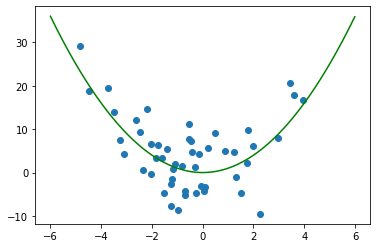

In [56]:
# Question 1

def data_generator_noisy(n):
    x = 2.*np.random.randn(n, 1)
    y = x**2 + 5.*np.random.randn(n, 1)
    return x, y


np.random.seed(3) # you can change the seed but 3 works quite well to see the effect of L^2 penalty!

x, y = data_generator_noisy(50)
x_true = np.arange(-6, 6, 0.01)
y_true = x_true**2


plt.scatter(x, y, label='noisy sampling')
plt.plot(x_true, y_true, label='ground truth', color='green')
plt.show()

In [57]:
# Question 2

train_data = torch.utils.data.TensorDataset(torch.tensor(x).float(), torch.tensor(y).float())

In [58]:
# Question 3

class TwoHiddenRegressor(nn.Module):
    def __init__(self, hidden_dim):
        super(TwoHiddenRegressor, self).__init__()
        self.layer_1 = nn.Linear(1, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer_3 = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        y = self.layer_1(x)
        y = self.activation(y)
        y = self.layer_2(y)
        y = self.activation(y)
        y = self.layer_3(y)
        return y

model_wrapper = ModelWrapper(TwoHiddenRegressor(hidden_dim=2048))
model_wrapper.compile(loss=nn.MSELoss(), 
                      optimizer=torch.optim.Adam)
model_wrapper.train(train_data, epochs=100, batch_size=2)

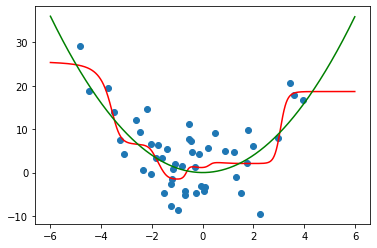

In [59]:
y_fit = model_wrapper.model(torch.tensor(x_true.reshape(-1, 1)).float().cuda()).detach().cpu().numpy()

plt.scatter(x, y, label='noisy sampling')
plt.plot(x_true, y_fit, label='ground truth', color='red')
plt.plot(x_true, y_true, label='ground truth', color='green')
plt.show()

In [60]:
model_wrapper = ModelWrapper(TwoHiddenRegressor(hidden_dim=2048))
model_wrapper.compile(loss=nn.MSELoss(), 
                      optimizer=torch.optim.Adam,
                      weight_decay=0.05)
model_wrapper.train(train_data, epochs=100, batch_size=2)

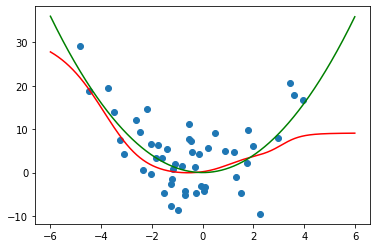

In [61]:
y_fit = model_wrapper.model(torch.tensor(x_true.reshape(-1, 1)).float().cuda()).detach().cpu().numpy()

plt.scatter(x, y, label='noisy sampling')
plt.plot(x_true, y_fit, label='ground truth', color='red')
plt.plot(x_true, y_true, label='ground truth', color='green')
plt.show()

# The power of depth

In this section, you are suggested to investigate the role of depth (i.e. stacking layers) when learning complex function.

We will study a simple problem of non-linear regression where we want to learn the function:
$$ y = \sin(x)$$
where $x \sim \mathcal N(0,\sigma^2)$ with $\sigma = 5$.



1.    Implement a one layer regressor with sigmoid activation. Vary the number of hidden units. What do you observe? Is it easy to learn all the variations of the sinus function? (You can play with  the optimizer for accelerating the learning convergence.)
2.   Implement a multi-layer regressor with sigmoid activation. Vary the depth of the model (add more layers). What do you observe? 
3. Plot a curve which shows that adding layers make learning more difficult. Do you know why? 


https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484



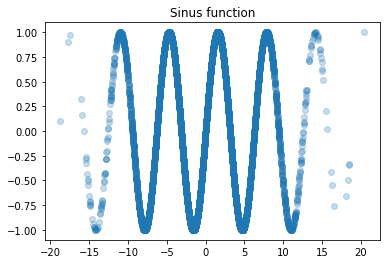

In [62]:
x = 5*np.random.randn(10000, 1)
y = np.sin(x)

plt.scatter(x, y, alpha=0.25)
plt.title('Sinus function')
plt.show()

In [63]:
# Question 1

class Regressor(nn.Module):
    def __init__(self, hidden_dim):
        super(Regressor, self).__init__()
        self.layer_1 = nn.Linear(1, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        h = self.layer_1(x)
        h = self.activation(h)
        y = self.layer_2(h)
        return self.activation(y)

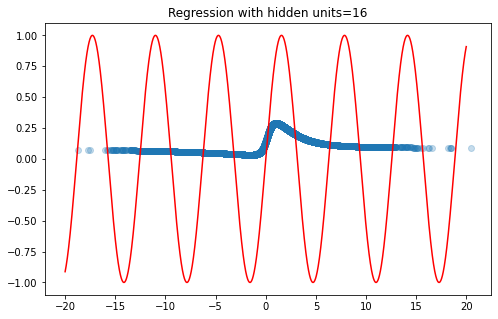

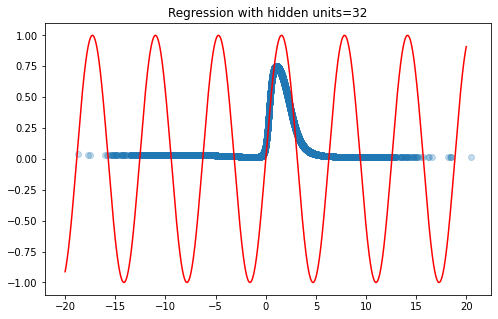

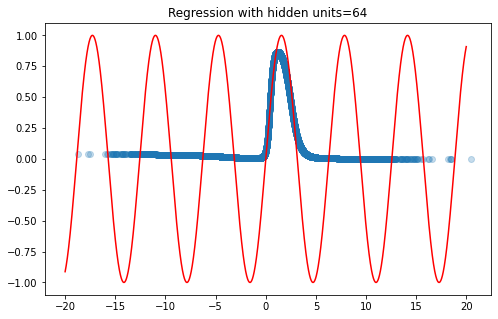

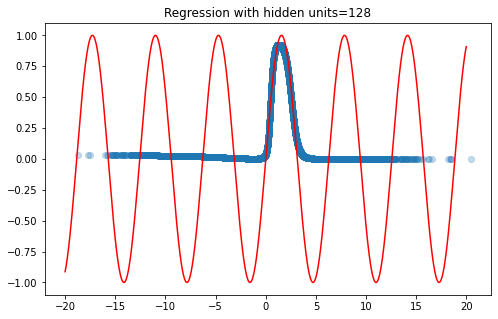

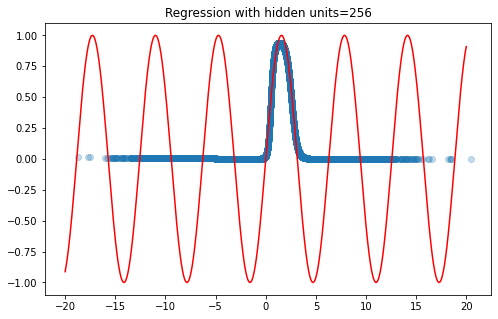

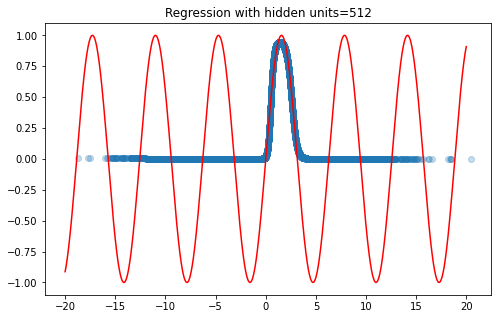

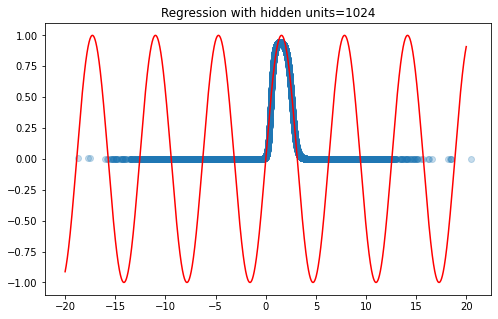

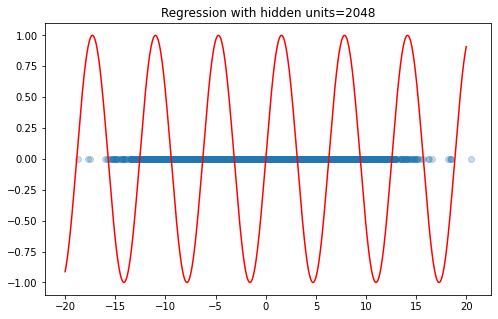

In [64]:
data = torch.utils.data.TensorDataset(torch.tensor(x).float(),torch.tensor(y).float())

for h in [16, 32, 64, 128, 256, 512, 1024]:
    model_wrapper = ModelWrapper(Regressor(hidden_dim=h))
    model_wrapper.compile(loss=nn.MSELoss(), 
                        optimizer=torch.optim.Adam)
    model_wrapper.train(data, epochs=10)

    y_hat = model_wrapper.model(torch.tensor(x).float().cuda()).cpu().detach().numpy()

    x_true = np.arange(-20, 20, 0.01)
    y_true = np.sin(x_true)

    plt.figure(figsize=(8, 5))
    plt.plot(x_true, y_true, label='ground truth', color='red')
    plt.scatter(x, y_hat, alpha=0.25, label='prediction')
    plt.title('Regression with hidden units='+str(h))
    plt.show()


In [65]:
class MultiLayerRegressor(nn.Module):
    def __init__(self, hidden_dim, n_layers, activation=nn.Sigmoid):
        super(MultiLayerRegressor, self).__init__()
        self.activation = activation()

        layers = [nn.Linear(1, hidden_dim), self.activation]
        for _ in range(n_layers-1):
            layers += [nn.Linear(hidden_dim, hidden_dim), self.activation]
        layers += [nn.Linear(hidden_dim, 1)]

        self.multi_layers = nn.Sequential(*layers)
      
    def forward(self, x):
        return self.multi_layers(x)

The one-hidden layer network fails to learn all the variation of the function... Let's try with a multi-layer regressor.

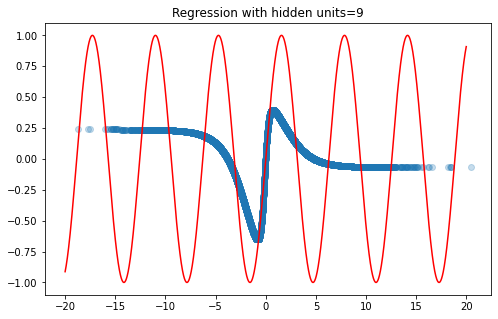

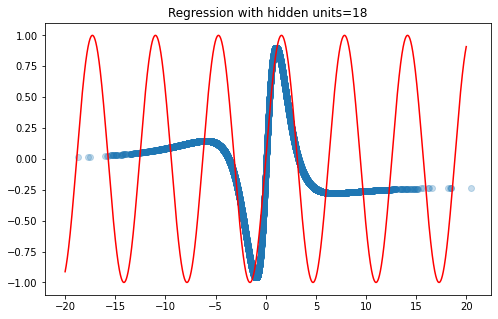

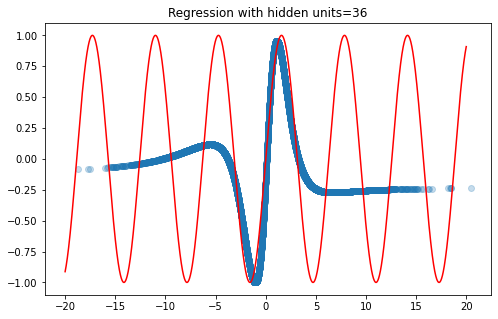

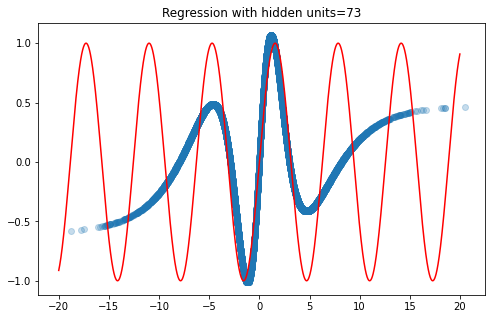

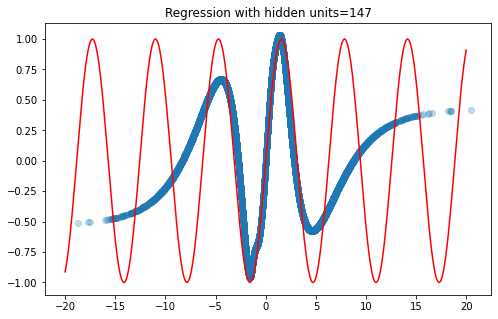

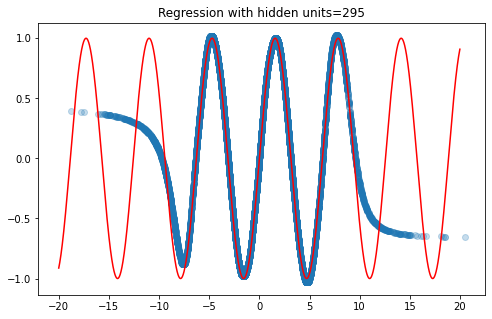

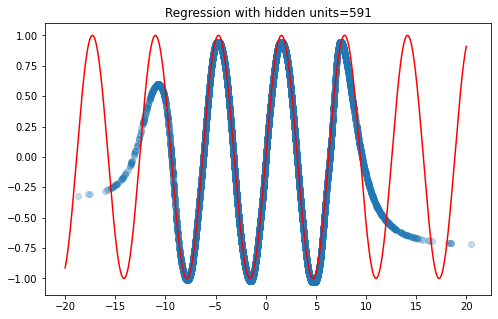

In [66]:
data = torch.utils.data.TensorDataset(torch.tensor(x).float(),torch.tensor(y).float())

n_layers = 3
# We will divide the number of hidden units by np.sqrt(n_layers) to make sure that
# networks have a similar number of parameters than a one-hidden layer network.

for h in [16, 32, 64, 128, 256, 512, 1024]:
    hidden_dim = int(1.*h / np.sqrt(n_layers))
    model_wrapper = ModelWrapper(MultiLayerRegressor(hidden_dim=hidden_dim, 
                                                   n_layers=n_layers))
    model_wrapper.compile(loss=nn.MSELoss(), 
                        optimizer=torch.optim.Adam)
    model_wrapper.train(data, epochs=10)

    y_hat = model_wrapper.model(torch.tensor(x).float().cuda()).cpu().detach().numpy()

    x_true = np.arange(-20, 20, 0.01)
    y_true = np.sin(x_true)

    plt.figure(figsize=(8, 5))
    plt.plot(x_true, y_true, label='ground truth', color='red')
    plt.scatter(x, y_hat, alpha=0.25, label='prediction')
    plt.title('Regression with hidden units='+str(hidden_dim))
    plt.show()

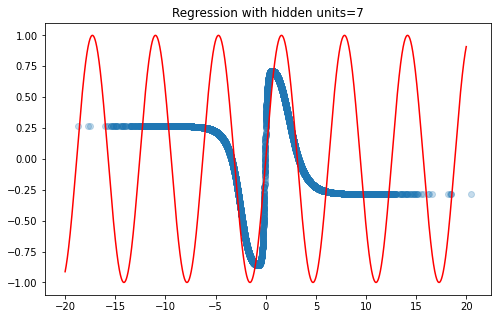

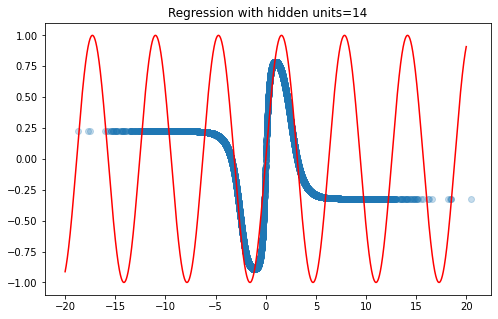

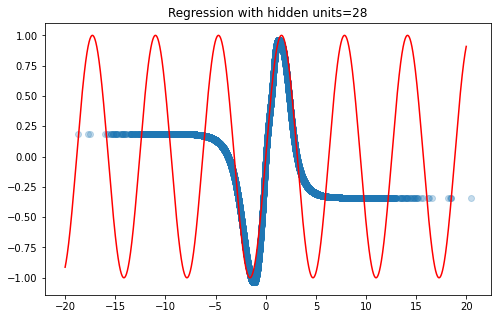

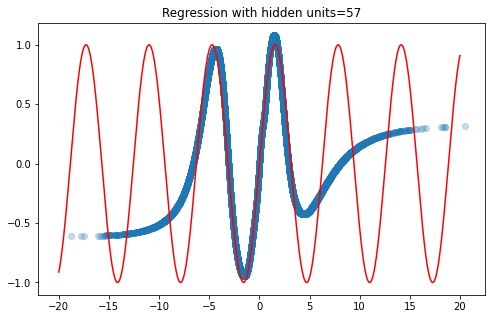

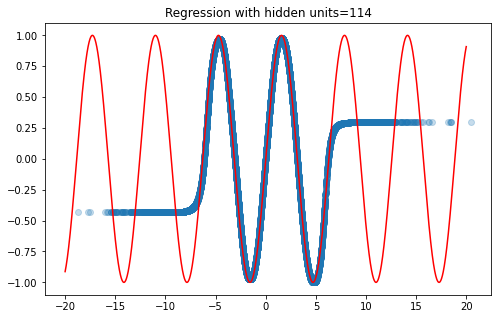

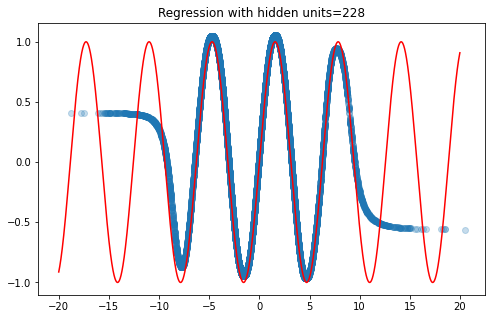

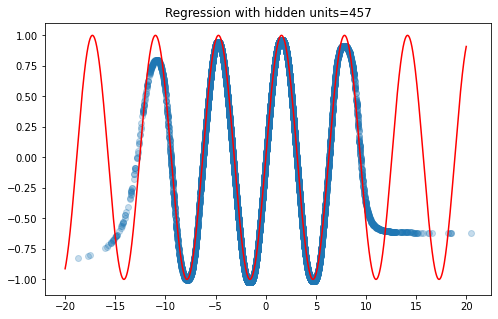

In [67]:
data = torch.utils.data.TensorDataset(torch.tensor(x).float(),torch.tensor(y).float())

n_layers = 5
# We will divide the number of hidden units by np.sqrt(n_layers) to make sure that
# networks have a similar number of parameters than a one-hidden layer network.

for h in [16, 32, 64, 128, 256, 512, 1024]:
    hidden_dim = int(1.*h / np.sqrt(n_layers))
    model_wrapper = ModelWrapper(MultiLayerRegressor(hidden_dim=hidden_dim, 
                                                   n_layers=n_layers))
    model_wrapper.compile(loss=nn.MSELoss(), 
                        optimizer=torch.optim.Adam)
    model_wrapper.train(data, epochs=10)

    y_hat = model_wrapper.model(torch.tensor(x).float().cuda()).cpu().detach().numpy()

    x_true = np.arange(-20, 20, 0.01)
    y_true = np.sin(x_true)

    plt.figure(figsize=(8, 5))
    plt.plot(x_true, y_true, label='ground truth', color='red')
    plt.scatter(x, y_hat, alpha=0.25, label='prediction')
    plt.title('Regression with hidden units='+str(hidden_dim))
    plt.show()

For a comparable numbers of parameters, a deep net can learn more sophisticated functions. That's why the deeper the better!

But too deep may lead to a new problem (e.g. when n_layers=10)

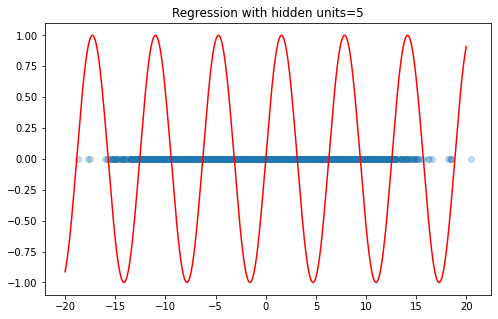

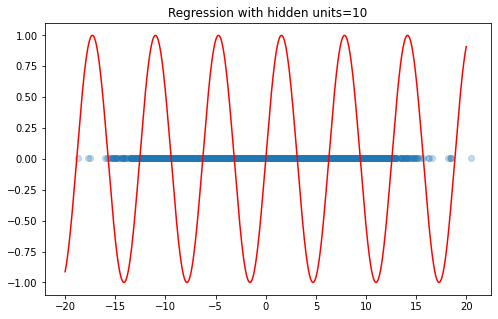

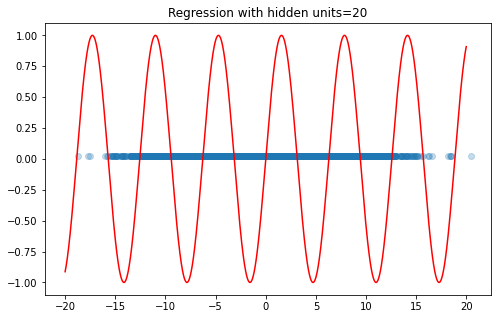

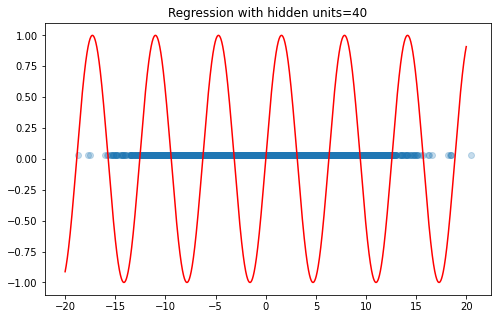

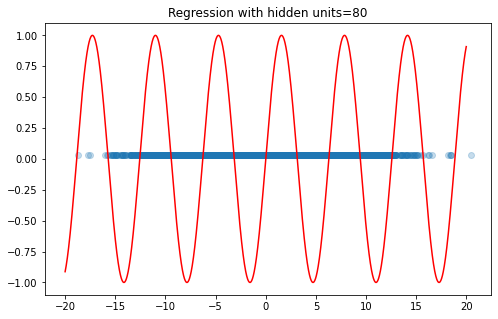

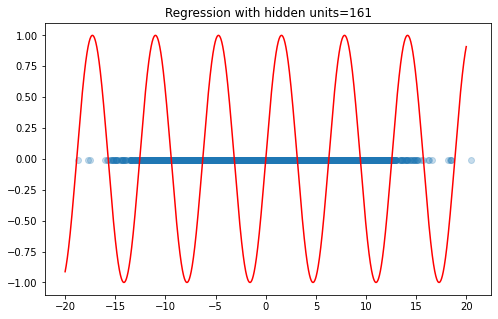

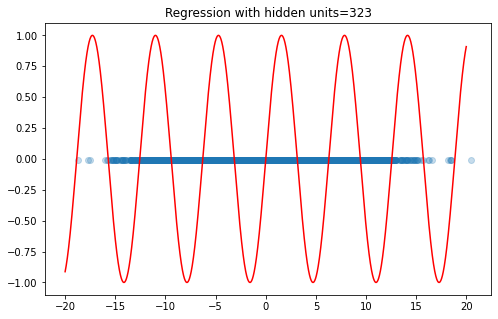

In [68]:
data = torch.utils.data.TensorDataset(torch.tensor(x).float(),torch.tensor(y).float())

n_layers = 10
# We will divide the number of hidden units by np.sqrt(n_layers) to make sure that
# networks have a similar number of parameters than a one-hidden layer network.

for h in [16, 32, 64, 128, 256, 512, 1024]:
    hidden_dim = int(1.*h / np.sqrt(n_layers))
    model_wrapper = ModelWrapper(MultiLayerRegressor(hidden_dim=hidden_dim, 
                                                   n_layers=n_layers))
    model_wrapper.compile(loss=nn.MSELoss(), 
                        optimizer=torch.optim.Adam)
    model_wrapper.train(data, epochs=10)

    y_hat = model_wrapper.model(torch.tensor(x).float().cuda()).cpu().detach().numpy()

    x_true = np.arange(-20, 20, 0.01)
    y_true = np.sin(x_true)

    plt.figure(figsize=(8, 5))
    plt.plot(x_true, y_true, label='ground truth', color='red')
    plt.scatter(x, y_hat, alpha=0.25, label='prediction')
    plt.title('Regression with hidden units='+str(hidden_dim))
    plt.show()

This is what we call the problem of *gradient vanishing*. The network fails to optimize the first layers by backprop because the gradient is multiplied many times by a factor lower than 1.


For instance, if the gradient norm is approximately 0.5 layer-wise (lower than 1). The first layer of a ten layers neural net will see a gradient of $0.5^{10} = 10^{-3}$ (close to 0).


See the RNN session and the blog post :https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

A first strategy for alleviating the problem of gradient vanishing is to use activation function with gradient very close to 1. That's why we use $\mathrm{ReLU}$ activation: 

$$\mathrm{ReLU}(x) = \max(x, 0) $$
where
$$\mathrm{ReLU}'(x) = \mathbf 1_{x>0} $$ 

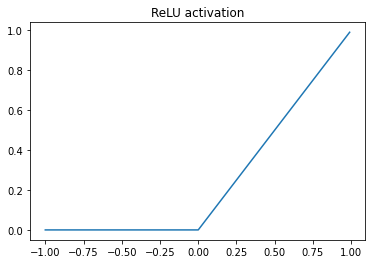

In [69]:
x = np.arange(-1, 1, 0.01)
plt.plot(x, np.maximum(x, 0))
plt.title('ReLU activation')
plt.show()

You can train easily a 10 layers network with ReLU activation :) 

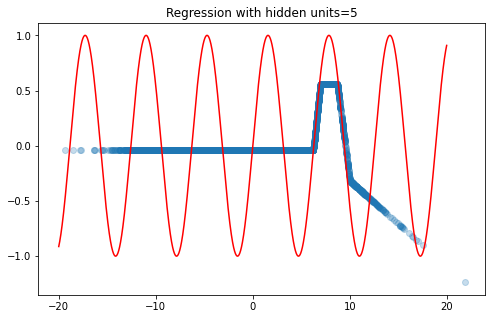

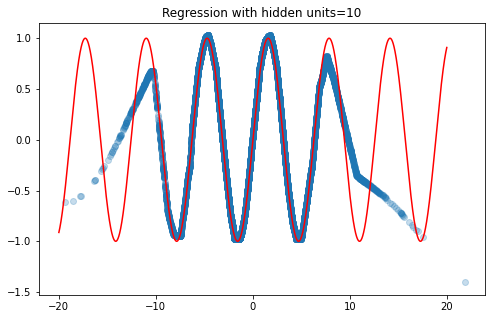

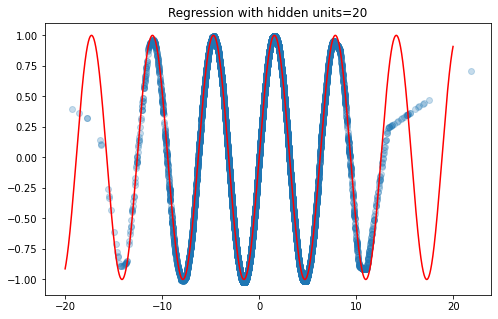

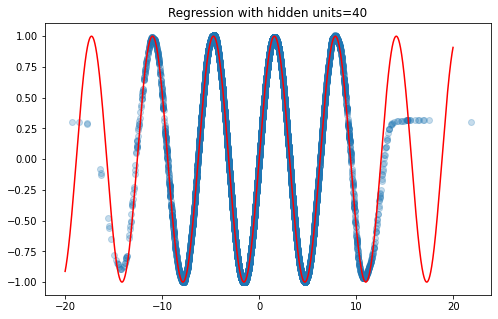

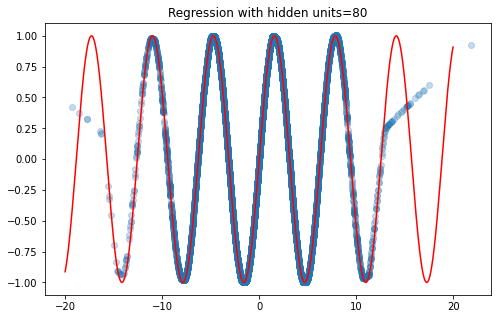

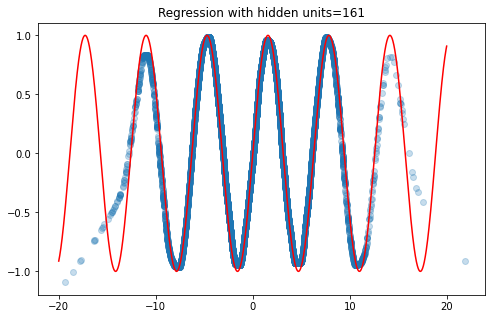

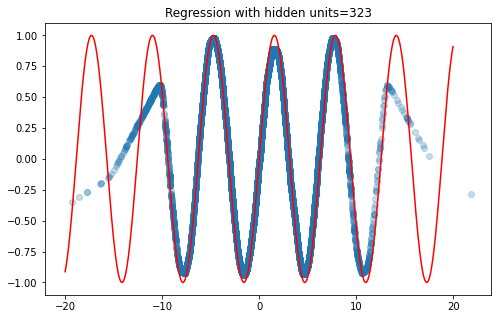

In [70]:
x = 5*np.random.randn(10000, 1)
y = np.sin(x)

data = torch.utils.data.TensorDataset(torch.tensor(x).float(),torch.tensor(y).float())

n_layers = 10
# We will divide the number of hidden units by np.sqrt(n_layers) to make sure that
# networks have a similar number of parameters than a one-hidden layer network.

for h in [16, 32, 64, 128, 256, 512, 1024]:
    hidden_dim = int(1.*h / np.sqrt(n_layers))
    model_wrapper = ModelWrapper(MultiLayerRegressor(hidden_dim=hidden_dim, 
                                                   n_layers=n_layers, 
                                                   activation=nn.ReLU))
    model_wrapper.compile(loss=nn.MSELoss(), 
                        optimizer=torch.optim.Adam)
    model_wrapper.train(data, epochs=10)

    y_hat = model_wrapper.model(torch.tensor(x).float().cuda()).cpu().detach().numpy()

    x_true = np.arange(-20, 20, 0.01)
    y_true = np.sin(x_true)

    plt.figure(figsize=(8, 5))
    plt.plot(x_true, y_true, label='ground truth', color='red')
    plt.scatter(x, y_hat, alpha=0.25, label='prediction')
    plt.title('Regression with hidden units='+str(hidden_dim))
    plt.show()

A beautiful alternative is to use residual blocks! 

The idea is to leack the previous layer in the next layer. It is now possible to train a deep network with sigmoid activation. 

In [72]:
class ResidualLayer(nn.Module):
    def __init__(self, layer, activation):
        super(ResidualLayer, self).__init__()
        self.layer = layer
        self.activation = activation

    def forward(self, x):
        return x + self.activation(self.layer(x))

class ResidualMultiLayerRegressor(nn.Module):
    def __init__(self, hidden_dim, n_layers, activation=nn.Sigmoid):
        super(ResidualMultiLayerRegressor, self).__init__()
        self.activation = activation()

        layers = [nn.Linear(1, hidden_dim)]
        for _ in range(n_layers-1):
            layers += [ResidualLayer(nn.Linear(hidden_dim, hidden_dim), self.activation)]
        layers += [nn.Linear(hidden_dim, 1)]

        self.multi_layers = nn.Sequential(*layers)
      
    def forward(self, x):
        return self.multi_layers(x)

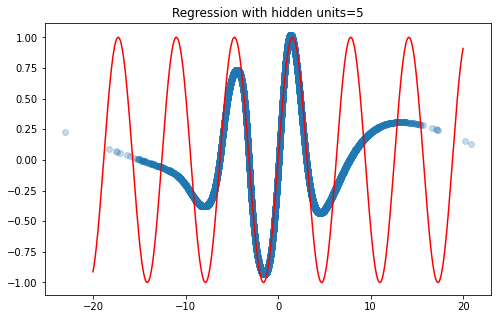

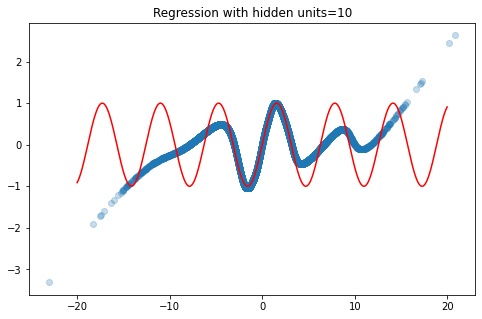

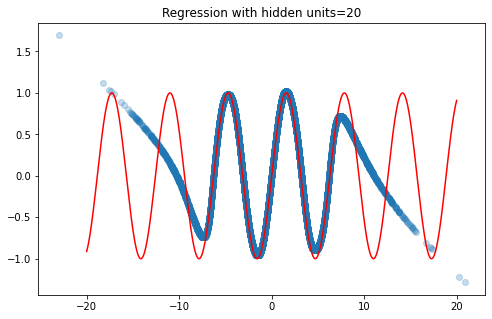

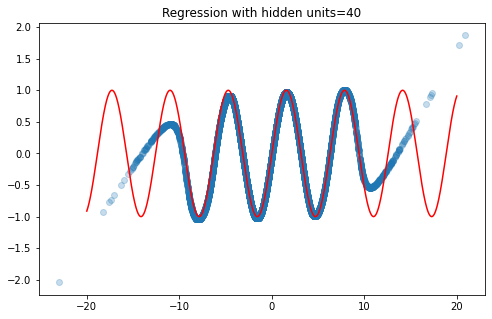

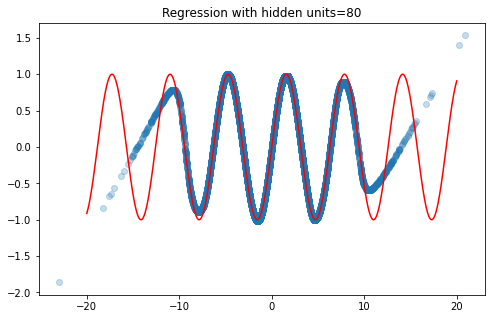

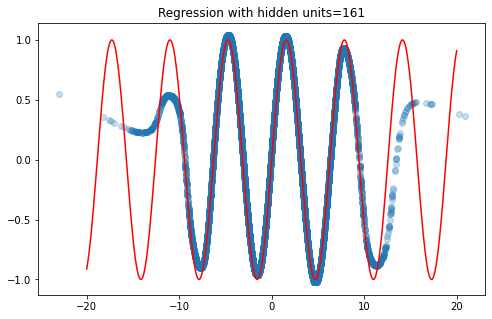

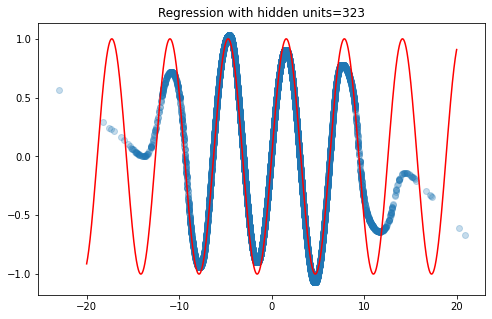

In [73]:
x = 5*np.random.randn(10000, 1)
y = np.sin(x)

data = torch.utils.data.TensorDataset(torch.tensor(x).float(),torch.tensor(y).float())

n_layers = 10
# We will divide the number of hidden units by np.sqrt(n_layers) to make sure that
# networks have a similar number of parameters than a one-hidden layer network.

for h in [16, 32, 64, 128, 256, 512, 1024]:
    hidden_dim = int(1.*h / np.sqrt(n_layers))
    model_wrapper = ModelWrapper(ResidualMultiLayerRegressor(hidden_dim=hidden_dim, n_layers=n_layers, activation=nn.Sigmoid))
    model_wrapper.compile(loss=nn.MSELoss(), 
                        optimizer=torch.optim.Adam)
    model_wrapper.train(data, epochs=10)

    y_hat = model_wrapper.model(torch.tensor(x).float().cuda()).cpu().detach().numpy()

    x_true = np.arange(-20, 20, 0.01)
    y_true = np.sin(x_true)

    plt.figure(figsize=(8, 5))
    plt.plot(x_true, y_true, label='ground truth', color='red')
    plt.scatter(x, y_hat, alpha=0.25, label='prediction')
    plt.title('Regression with hidden units='+str(hidden_dim))
    plt.show()

These seemingly simple tricks have led to remarkable progress for training deep neural networks, and are the result of about two decades of research.


# Auto-Encoder

Auto-encoder is a class of models where we want to learn two functions:
1. $f$ an encoder,
2. $g$ a decoder,

where $x \approx g(z)$ where $z := f(x)$. $z$ is called a bottleneck because it is usually a vector with a much smaller dimension than $x$. Thus, the model has to learn to select patterns in $x$ that can be encoded in a low dimensional vector $z$.

Implement an auto-encoder which encodes mnist images in a vector of dim 32.

Can you establish connections with Principal Component Analysis? https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [76]:
class AutoEncoderWrapper:
    def __init__(self, model):
        self.model = model
        self.train_loader = None
        self.optimizer = None
        self.loss = None
        self.cuda = False

    def train_one_iter(self, x):
        self.optimizer.zero_grad()
        if self.cuda:
            x = x.cuda()
        x_hat = self.model(x)
        loss = nn.MSELoss()(x.reshape(-1, 28*28), x_hat.reshape(-1, 28*28))
        loss.backward()
        self.optimizer.step()
    
    def train(self, training_data, batch_size=32, epochs=10):
        self.model.train()
        train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size) 
        for _ in range(epochs):
            for x, __ in train_loader:
                self.train_one_iter(x)

    def test(self, testing_data, batch_size=256):
        test_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size)
        loss = []
        for x, _ in test_loader:
            if self.cuda:
                x = x.cuda()
            x_hat = self.model(x)
            loss.append(nn.MSELoss(reduction='None')(x.reshape(-1, 28*28), x_hat.reshape(-1, 28*28))
        return torch.cat(loss).mean()

    def compile(self, optimizer, lr=0.001, cuda=True):
        try: 
            self.optimizer = optimizer(params=self.model.parameters(), lr=lr)
        except:
            print('Must be called after create_model()')    

        self.cuda = cuda
        if self.cuda:
            self.model = self.model.cuda()

class AutoEncoder(nn.Module):
    def __init__(self, 
               dim=28*28, 
               hidden_dim=128, 
               dropout=0.25,
               bottleneck_dim=32,
               activation=nn.ReLU):
        super(AutoEncoder, self).__init__()
        self.activation = activation()

        self.enc_layer_1 = nn.Linear(dim, hidden_dim)
        self.enc_bn_1 = nn.BatchNorm1d(hidden_dim)
        self.enc_dropout_1 = nn.Dropout(dropout)
        self.enc_layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.enc_bn_2 = nn.BatchNorm1d(hidden_dim)
        self.enc_dropout_2 = nn.Dropout(dropout)
        self.enc_layer_3 = nn.Linear(hidden_dim, bottleneck_dim)

        self.dec_layer_1 = nn.Linear(bottleneck_dim, hidden_dim)
        self.dec_bn_1 = nn.BatchNorm1d(hidden_dim)
        self.dec_dropout_1 = nn.Dropout(dropout)
        self.dec_layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.dec_bn_2 = nn.BatchNorm1d(hidden_dim)
        self.dec_dropout_2 = nn.Dropout(dropout)
        self.dec_layer_3 = nn.Linear(hidden_dim, dim)

    def encode(self, x):
        # Reshape 
        x = x.reshape(-1, 28*28)

        # Layer 1
        h = self.enc_layer_1(x)
        h = self.enc_bn_1(h)
        h = self.enc_dropout_1(h)
        h = self.activation(h)

        # Layer 2
        h = self.enc_layer_2(h)
        h = self.enc_bn_2(h)
        h = self.enc_dropout_2(h)
        h = self.activation(h)

        # Layer 3
        h = self.enc_layer_3(h)
        return h 

    def decode(self, h):
        # Layer 1
        x = self.dec_layer_1(h)
        x = self.dec_bn_1(x)
        x = self.dec_dropout_1(x)
        x = self.activation(x)

        # Layer 2
        x = self.dec_layer_2(x)
        x = self.dec_bn_2(x)
        x = self.dec_dropout_2(x)
        x = self.activation(x)

        # Layer 3
        x = self.dec_layer_3(x)

        # Reshape 
        x = x.reshape(-1, 28, 28)

        return x

    def forward(self, x):
        h = self.encode(x)
        x_hat = self.decode(h)
        return x_hat

    def loss(self, x, y):
        x_hat = self.forward(x)
        return nn.MSELoss()(x_hat, x)

In [77]:
mnist_train = torchvision.datasets.MNIST(root='data/train', download=True, train=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='data/test', download=True, train=False, transform=transform)

model_wrapper = AutoEncoderWrapper(AutoEncoder())
model_wrapper.compile(optimizer=torch.optim.Adam, lr=0.001)

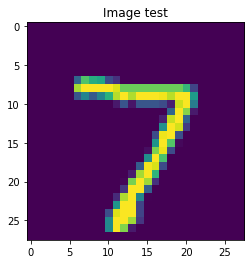

Loss tensor(0.2031, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1, 28, 28])) that is different to the input size (torch.Size([1, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


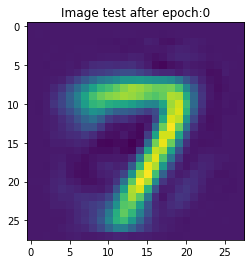

Loss tensor(0.1919, device='cuda:0', grad_fn=<MseLossBackward>)


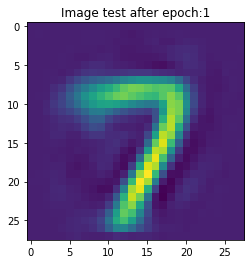

KeyboardInterrupt: ignored

In [78]:
test_loader = iter(torch.utils.data.DataLoader(mnist_test))
image_test, _ = test_loader.next()

plt.imshow(image_test.numpy()[0][0])
plt.title('Image test')
plt.show()

for epoch in range(100):
    model_wrapper.train(mnist_train, epochs=1)

    model_wrapper.model.eval()
    image = model_wrapper.model(image_test.cuda()).cpu()

    print('Loss', model_wrapper.model.loss(image_test.cuda(), None))
    plt.imshow(image.detach().numpy()[0])
    plt.title('Image test after epoch:'+str(epoch))
    plt.show()
